# 📦 1. Import Libraries

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
import json

# 📂 2. Load Dataset

In [127]:
data = pd.read_excel('ipl_colab.xlsx')
print("Dataset shape:", data.shape)
data.head()

Dataset shape: (76014, 15)


,mid,date,venue,batting_team,bowling_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


# 📊 3. Initial Data Inspection

In [128]:
data.info()
data.describe()
data.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   mid             76014 non-null  int64         
 1   date            76014 non-null  datetime64[ns]
 2   venue           76014 non-null  object        
 3   batting_team    76014 non-null  object        
 4   bowling_team    76014 non-null  object        
 5   batsman         76014 non-null  object        
 6   bowler          76014 non-null  object        
 7   runs            76014 non-null  int64         
 8   wickets         76014 non-null  int64         
 9   overs           76014 non-null  float64       
 10  runs_last_5     76014 non-null  int64         
 11  wickets_last_5  76014 non-null  int64         
 12  striker         76014 non-null  int64         
 13  non-striker     76014 non-null  int64         
 14  total           76014 non-null  int64         
dtypes:

mid               617
date              442
venue              35
batting_team       14
bowling_team       14
batsman           411
bowler            329
runs              252
wickets            11
overs             140
runs_last_5       102
wickets_last_5      8
striker           155
non-striker        88
total             138
dtype: int64

# 🧹 4. Data Cleaning & Filtering

##  Drop rows with missing values if any

In [129]:
data.dropna(inplace=True)

## Check if required columns exist (optional)

In [130]:
required_columns = ['batting_team', 'bowling_team', 'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']
assert all(col in data.columns for col in required_columns), "Missing required columns!"

## Keep only consistent teams

In [131]:
teams = [
    'Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
    'Delhi Daredevils', 'Sunrisers Hyderabad'
]

data = data[(data['batting_team'].isin(teams)) & (data['bowling_team'].isin(teams))]


## Convert and filter dates from 2013 onward

In [132]:
data['date'] = pd.to_datetime(data['date'])
data = data[data['date'].dt.year >= 2013]

### 🧹Drop unnecessary columns

In [133]:
# Extract temporal features
data.drop(columns=['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker'], inplace=True)
data.head()

,date,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
38657,2013-04-03,Delhi Daredevils,Kolkata Knight Riders,0,1,0.1,0,1,128
38658,2013-04-03,Delhi Daredevils,Kolkata Knight Riders,4,1,0.2,4,1,128
38659,2013-04-03,Delhi Daredevils,Kolkata Knight Riders,5,1,0.3,5,1,128
38660,2013-04-03,Delhi Daredevils,Kolkata Knight Riders,5,1,0.4,5,1,128
38661,2013-04-03,Delhi Daredevils,Kolkata Knight Riders,5,1,0.5,5,1,128


# 🧠 5. Feature Engineering

In [134]:
data.columns

Index(['date', 'batting_team', 'bowling_team', 'runs', 'wickets', 'overs',
       'runs_last_5', 'wickets_last_5', 'total'],
      dtype='object')

In [135]:
encoded_df['year'] = data['date'].dt.year
encoded_df['month'] = data['date'].dt.month
encoded_df['day'] = data['date'].dt.day

In [146]:
#  One-Hot Encode Categorical Variables
df_encoded = pd.get_dummies(data, columns=['batting_team', 'bowling_team'], drop_first=False)
df_encoded.head()

,runs,wickets,overs,runs_last_5,wickets_last_5,total,batting_team_Chennai Super Kings,batting_team_Delhi Daredevils,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,...,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Chennai Super Kings,bowling_team_Delhi Daredevils,bowling_team_Kings XI Punjab,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad
38657,0,1,0.1,0,1,128,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
38658,4,1,0.2,4,1,128,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
38659,5,1,0.3,5,1,128,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
38660,5,1,0.4,5,1,128,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
38661,5,1,0.5,5,1,128,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False


In [137]:
data.drop('date', axis=1, inplace=True)
data.head()

,batting_team,bowling_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
38657,Delhi Daredevils,Kolkata Knight Riders,0,1,0.1,0,1,128
38658,Delhi Daredevils,Kolkata Knight Riders,4,1,0.2,4,1,128
38659,Delhi Daredevils,Kolkata Knight Riders,5,1,0.3,5,1,128
38660,Delhi Daredevils,Kolkata Knight Riders,5,1,0.4,5,1,128
38661,Delhi Daredevils,Kolkata Knight Riders,5,1,0.5,5,1,128


# 🔄 6. Train-Test Split

In [138]:
X = encoded_df.drop('total', axis=1)
y = encoded_df['total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train samples: {len(X_train)}, Test samples: {len(X_test)}")

Train samples: 23080, Test samples: 5771


# 🤖 7. Model Training

In [139]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# 📈 8. Evaluate the Model

In [140]:
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 1.0935262519494022
MSE: 6.923756368047133
RMSE: 2.6313031691629782
R² Score: 0.9915638063239213


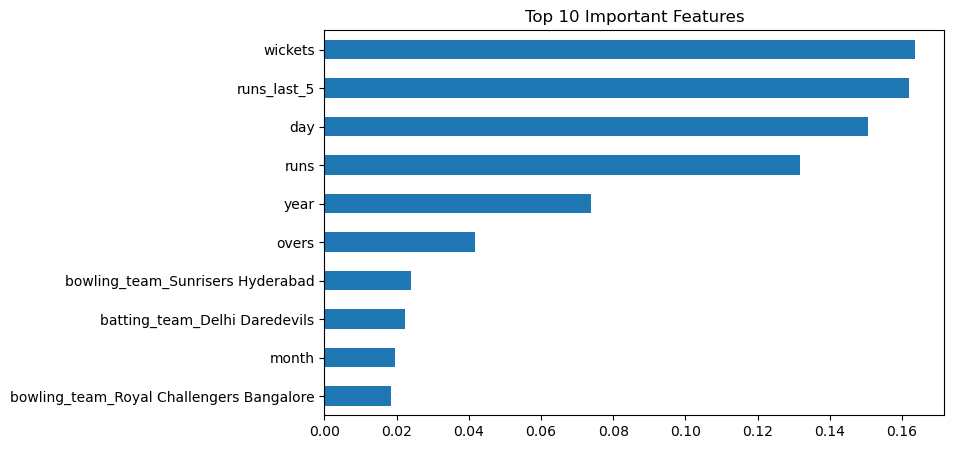

In [141]:
importances = model.feature_importances_
features = X.columns

# Plot top 10 important features
feature_df = pd.Series(importances, index=features).sort_values(ascending=False).head(10)
feature_df.plot(kind='barh', title="Top 10 Important Features", figsize=(8, 5))
plt.gca().invert_yaxis()
plt.show()


# Visualization

In [142]:
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 1.0935262519494022
MSE: 6.923756368047133
RMSE: 2.6313031691629782
R² Score: 0.9915638063239213


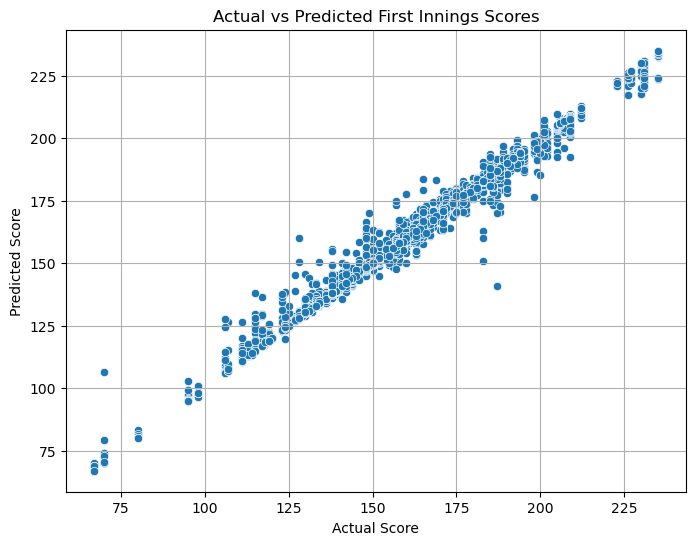

In [143]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Score")
plt.ylabel("Predicted Score")
plt.title("Actual vs Predicted First Innings Scores")
plt.grid(True)
plt.show()

# 💾 9. Save the Model

In [144]:
with open('ipl_score_predictor.pkl', 'wb') as f:
    pickle.dump(model, f)

print("✅ Model saved as ipl_score_predictor.pkl")

✅ Model saved as ipl_score_predictor.pkl


In [145]:
# Save feature column names (needed for app)
with open('model_features.json', 'w') as f:
    json.dump(X.columns.tolist(), f)
print("✅ Model saved as model_features.json")

✅ Model saved as model_features.json
